In [127]:
import os
_ROOT_PATH = os.path.join('..', '..', '..')
_OPTIM_DIR = os.path.join(_ROOT_PATH, 'experiments', 'optim')

import sys
sys.path.append('..')
sys.path.append(os.path.join('..', '..', '..', 'tools'))
import plotconfig

In [128]:
import file_tools
import saving_tools
import face_tools

In [129]:
from scipy.spatial import distance
import pickle

result_df = pd.DataFrame()

fs = file_tools.list_files(_OPTIM_DIR, "*.json")
for f in fs:
    d = saving_tools.load_dict_from_json(f)
    df_filename = os.path.join(_ROOT_PATH, d['df_filename'])

    df = pd.read_parquet(df_filename, engine='pyarrow')
    df['method_name'] = d['method_name']

    target_data = np.load(d['target_filename'])
    target_face = target_data['target_face']

    params_columns = ['params_x0', 'params_x1', 'params_x2', 'params_x3', 'params_x4', 
                  'params_x5', 'params_x6', 'params_x7', 'params_x8', 'params_x9']
    params_array = df[params_columns].to_numpy()

    pca_face_filename = os.path.join(_ROOT_PATH, d['pca_face_filename'])
    with open(pca_face_filename, 'rb') as file:
        pca_face = pickle.load(file)
    tested_faces = pca_face.inverse_transform(params_array)
    
    euclidean_distances = np.array([distance.euclidean(target_face, row) for row in tested_faces])
    df['euclidean_distance'] = euclidean_distances
    
    columns_to_keep = ['number', 'value', 'method_name', 'euclidean_distance']
    new_df = df[columns_to_keep]
    
    result_df = pd.concat([result_df, new_df], ignore_index=True)

In [103]:
result_df

""


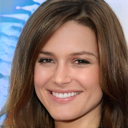

In [78]:
import numpy as np
face_tools.img_from_latent(np.array(d['best_face']))

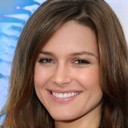

In [79]:
target_data = np.load(d['target_filename'])
target_face = target_data['target_face']
face_tools.img_from_latent(target_face)

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
d.keys()

dict_keys(['seed', 'eeg_name', 'method_name', 'n_component_face', '_N_TRIALS', '_BOUNDS', 'best_params', 'best_value', 'best_face', 'best_distance', 'dataset_path', 'target_filename', 'train_filename', 'df_filename', 'pca_eeg_filename', 'pca_face_filename'])

In [28]:
df_filename = os.path.join(_ROOT_PATH, d['df_filename'])

In [33]:
df = pd.read_parquet(df_filename, engine='pyarrow')
df['method_name'] = d['method_name']
df

,number,value,datetime_start,datetime_complete,duration,params_x0,params_x1,params_x2,params_x3,params_x4,...,system_attrs_cma:n_restarts_with_large,system_attrs_cma:optimizer:0,system_attrs_cma:optimizer:1,system_attrs_cma:optimizer:2,system_attrs_cma:optimizer:3,system_attrs_cma:popsize,system_attrs_cma:poptype,system_attrs_cma:small_n_eval,state,method_name
0,0,1.016011,2024-08-02 11:20:54.572674,2024-08-02 11:20:55.046089,0 days 00:00:00.473415,0.122914,4.970265,2.560418,-3.001217,2.374403,...,NaN,None,None,None,None,NaN,None,NaN,COMPLETE,LinearRegression
1,1,1.029955,2024-08-02 11:20:55.046643,2024-08-02 11:20:55.488106,0 days 00:00:00.441463,-0.481837,1.167487,1.446649,0.006519,0.190969,...,0.0,None,None,None,None,10.0,small,0.0,COMPLETE,LinearRegression
2,2,1.025413,2024-08-02 11:20:55.488673,2024-08-02 11:20:55.933944,0 days 00:00:00.445271,1.749273,0.061051,1.439544,-2.223636,0.063378,...,0.0,None,None,None,None,10.0,small,0.0,COMPLETE,LinearRegression
3,3,1.024140,2024-08-02 11:20:55.934507,2024-08-02 11:20:56.472593,0 days 00:00:00.538086,-0.668740,0.171404,-0.633526,0.853611,-1.659040,...,0.0,None,None,None,None,10.0,small,0.0,COMPLETE,LinearRegression
4,4,1.030190,2024-08-02 11:20:56.473200,2024-08-02 11:20:56.903878,0 days 00:00:00.430678,-0.846289,1.054923,0.534195,-0.502113,-1.929834,...,0.0,None,None,None,None,10.0,small,0.0,COMPLETE,LinearRegression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,1.045486,2024-08-02 11:57:27.244753,2024-08-02 11:57:27.700107,0 days 00:00:00.455354,-0.244989,-0.066072,0.093253,0.313621,0.209404,...,0.0,None,None,None,None,10.0,small,0.0,COMPLETE,LinearRegression
4996,4996,1.048855,2024-08-02 11:57:27.702198,2024-08-02 11:57:28.152513,0 days 00:00:00.450315,-0.207565,-0.185039,0.090596,0.345151,0.146323,...,0.0,None,None,None,None,10.0,small,0.0,COMPLETE,LinearRegression
4997,4997,1.041197,2024-08-02 11:57:28.155092,2024-08-02 11:57:28.623831,0 days 00:00:00.468739,-0.237055,-0.201650,0.043079,0.362937,0.160328,...,0.0,None,None,None,None,10.0,small,0.0,COMPLETE,LinearRegression
4998,4998,1.044719,2024-08-02 11:57:28.625951,2024-08-02 11:57:29.071875,0 days 00:00:00.445924,-0.271780,-0.091784,0.068837,0.369180,0.231190,...,0.0,None,None,None,None,10.0,small,0.0,COMPLETE,LinearRegression


<Axes: xlabel='number', ylabel='value'>

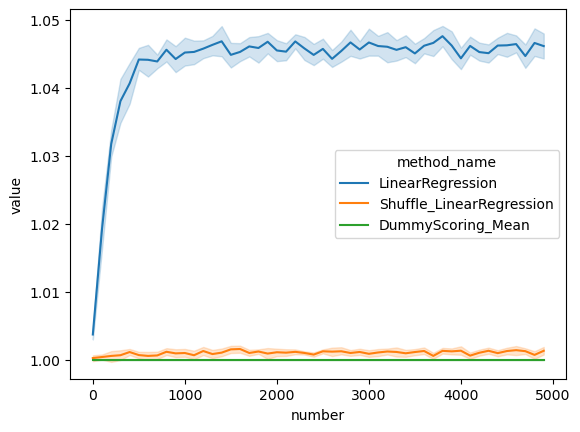

In [125]:
import seaborn as sns

# Define the interval for subsampling
interval = 100
numbers_to_keep = list(range(0, result_df['number'].max() + 1, interval))
subsampled_df = result_df[result_df['number'].isin(numbers_to_keep)]

sns.lineplot(data=subsampled_df, x='number', y='value', hue='method_name')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


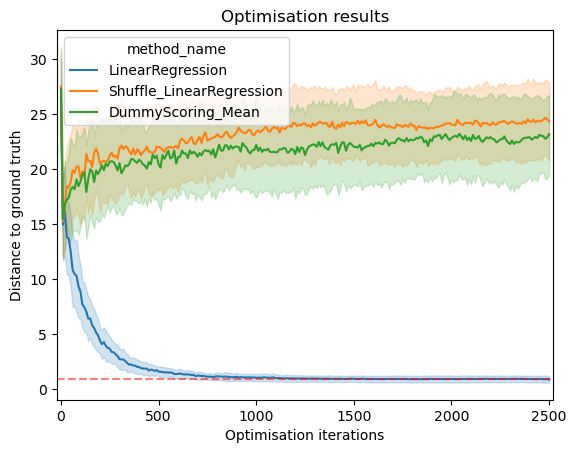

In [146]:
import seaborn as sns

# Define the interval for subsampling
interval = 10
numbers_to_keep = list(range(0, result_df['number'].max() + 1, interval))
subsampled_df = result_df[result_df['number'].isin(numbers_to_keep)]

mask = ((subsampled_df['number'] <= 2500))
subsampled_df = subsampled_df[mask]

ax = sns.lineplot(data=subsampled_df, x='number', y='euclidean_distance', hue='method_name', errorbar='sd')

mask = ((subsampled_df['method_name'] == 'LinearRegression') &
       (subsampled_df['number'] > 2400))
tmp = subsampled_df[mask]
ax.axhline(y=np.mean(tmp['euclidean_distance']), color='red', alpha=0.5, linestyle='--', label='Euclidean Top Rank (LinReg)')


plt.xlabel('Optimisation iterations')
plt.ylabel('Distance to ground truth')
plt.title('Optimisation results')

plt.xlim([-20, 2520])

# Save as high-definition
fbasename = "optim"
plt.gcf().savefig(f'{fbasename}.png', format='png', dpi=300, bbox_inches='tight')
plt.gcf().savefig(f'{fbasename}.eps', format='eps', dpi=1200, bbox_inches='tight')
plt.gcf().savefig(f'{fbasename}.svg', format='svg', dpi=1200, bbox_inches='tight')

In [93]:
distance.euclidean(target_face, pca_face.inverse_transform([-15]*10))

47.426170584518786

In [147]:
np.mean(tmp['euclidean_distance'])

0.9025817634664156